# Sampling Statistics
Point estimates are estimates of population parameters based on sample data.

The average of a sample is known as the sample mean. Sampling distribution can be thought of as relative frequency distribution with a large number of samples. A relative frequency distribution tends to approach the sampling distribution as the number of samples increase.

In order to learn the **population mean**, we don't measure the whole population. Instead, we take a random sample and use **sample mean, ( x_bar or $\bar{x}$ )** to estimate the population mean **( mu or $\mu$ )**. The sample mean is usually not exactly the same as the population mean and depends upon the values of samples chosen, however, the population mean remains fixed. While using the **sample mean** to estimate the population mean, we come across the **sampling error**, which directly relates to the **standard deviation** of a sampling statistic (e.g. mean values). This difference can be caused by many factors including poor survey design, biased sampling methods, and the randomness inherent to drawing a sample from a population.

## Step 1

Let's calculate the population mean first, which we calculate as:

**$\large \mu = \frac{\text{sum of all elements}}{N}$**, where N is population size.

In [1]:
# Import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

Create two lists, one with pumpkin names and one with the respective pumpkin weights. Combine the lists to create a pumpkin directory with the pumpkin names as keys and the pumpkin weights as values. 

In [2]:
# Create two lists with pumpkin names and weights
pumpkin = ["A", "B", "C", "D", "E", "F"]
weights = [19,14,15,9,10,17]

# Combine both lists to create a dictionary
pumpkin_dict = {key:value for key,value in zip(pumpkin, weights)}
print(pumpkin_dict)

{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


Now, let's try to calculate the mean of the pumpkin population and also visualize the weight distribution. 

In [3]:
# Calculate the population mean from pumpkin_dict
def calculate_mu(x):
    d = np.sum(list(x.values()))/len(x.values())
    return d
mu = calculate_mu(pumpkin_dict)
mu

14.0

That was a pretty a straightforward exercise. Let's use the data we have so far to visualize the weights of individual pumpkins and mean weight. 

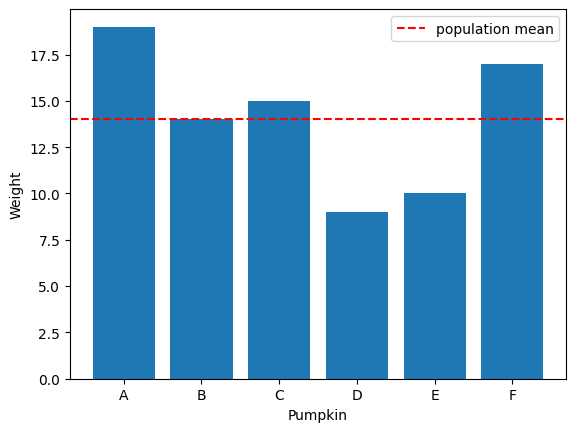

In [4]:
# Plot a bar graph showing weights of pumpkins and highlight the mean weight
plt.bar(data = pumpkin_dict,x = pumpkin_dict.keys(), height = pumpkin_dict.values())
plt.axhline(mu, color = 'red', linestyle = "--", label = "population mean")
plt.legend()
plt.xlabel("Pumpkin")
plt.ylabel("Weight");

We can see only one pumpkin has a weight which is equal to the mean weight (B:14). Let's try to simulate the random sampling process as stated below. 

## Step 2 : Calculate the mean of samples

From the `pumpkin_dict`, we can now obtain the sampling distributions of the sample mean for a given sample size. We'll do this while sampling *without* replacement (to reflect the idea that one can have two pumpkins at a given time, and will be taken out of population once used). 

Let's also try to make the code more flexible to allow sampling of any number of pumpkins from the population to study the effect of the sample size on the sample mean. 

To achieve this, first, we need to identify all the possible combinations that can be observed by choosing 2 pumpkins from the population, following the game rule.

In [19]:
# Identify a sample size n 
n = 2 

# Use itertools.combinations() to generate and print a list of combinations
combs = list(itertools.combinations(pumpkin_dict, n))
# Using 2 samples, we can see 15 possible combinations as below:
# [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), 
#  ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), 
#  ('E', 'F')]

x_bar_list = []
for comb in combs:
    if comb[0] in pumpkin_dict.keys():
        mean = (pumpkin_dict[comb[0]] + pumpkin_dict[comb[1]])/2
    x_bar_list.append(mean)

np.sum(x_bar_list)/len(x_bar_list)

14.0

Great! We can now generate any number of combinations from the population (try changing the value of `n` above). The next step in the process is to calculate the mean of all possible combinations and study whether these means differ from the population mean, and whether sample size has any effect on estimating the population mean. 

Let's write a function that would include the code for generating combinations as above and also for identifying the mean for each sample. 

In [33]:
def sample_means (sample_size, data):
    
    """
    This function takes in population data as a dictionary along 
    with a chosen sample size to generate all possible combinations 
    of given sample size. 
    The function calculates the mean of each sample and returns:
    a) a list of all combinations (as tuples) 
    b) a list of means for all sample
    """
    
    n = sample_size
    # Calculate the mean of population
    mu = calculate_mu(data)
    print(f"Mean of population is {mu}")
    
    # Generate all possible combinations using given sample size
    combs = list(itertools.combinations(data, sample_size))
    
    # Calculate the mean weight (x_bar) for all the combinations 
    # (samples) using the given data
    x_bar_list = []
    for comb in combs:
        if comb[0] in data.keys():
            mean = (data[comb[0]] + data[comb[1]])/2
        x_bar_list.append(mean)

    # Calculate sample mean for all combinations and append to x_bar_list
    
    return combs, x_bar_list

n= 2 # Sample size
combs, means = sample_means(n, pumpkin_dict)
# Print the sample combinations with their means
for comb, mean in zip(combs, means):
    print(f"{comb} {mean}")

Mean of population is 14.0
('A', 'B') 16.5
('A', 'C') 17.0
('A', 'D') 14.0
('A', 'E') 14.5
('A', 'F') 18.0
('B', 'C') 14.5
('B', 'D') 11.5
('B', 'E') 12.0
('B', 'F') 15.5
('C', 'D') 12.0
('C', 'E') 12.5
('C', 'F') 16.0
('D', 'E') 9.5
('D', 'F') 13.0
('E', 'F') 13.5


Thus, even though each sample may give you an answer involving some error, the expected value is right at the target: exactly the population mean. In other words: 
>If one does the experiment over and over again, the overall average of the sample mean is exactly the population mean.

In the output above, we can see that some mean values i.e. 14.5, 12, are being repeated in the combinations. We can develop a frequency table to identify the probability of seeing a different mean value.

In [40]:
freq = {}
for mean in means:
    if mean in freq:
        freq[mean] += 1
    else:
        freq[mean] = 1
prob = []
for pro in freq.values():
    prob.append(pro/len(means))
prob

[0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.13333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.13333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

In [46]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probablitity of each mean value
    '''
    # Calculate the frequency of each mean value
    freq = {}
    for mean in x_bar_list:
        if mean in freq:
            freq[mean] += 1
        else:
            freq[mean] = 1
            
    prob = []
    for pro in freq.values():
        prob.append(pro/len(means))
    # Calculate and append frequency of each mean value in the prob list. 
    
    return prob

probs = calculate_probability(means)
probs

[0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.13333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.13333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

# FUCK THIS SHIT